In [1]:

import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from tqdm import tqdm

## Data Importation

In [2]:
## en considérant les fichiers .con en entier ##
## Création du fichier json d'entraînement

def json_file_data_from_con(PATH_DATA, json_filename):
        
        L_concepts = []

        with open(json_filename, 'w') as  data_file:
                
                for file_con in os.listdir(PATH_DATA):
                        
                        filename = PATH_DATA + file_con
                        file = open(filename, 'r')
                        text = file.readlines() 
                        
                        dict_concept = {}
                        dict_concept["filename"] = filename
                        dict_concept["concept"] = ""
                        
                        for row in text:
                                row_split = row[2:].split(" ")
                                
                                concept_split = [word for word in row_split[:len(row_split) - 2]]
                                concept = ""
                                
                                for word in concept_split:
                                        word = word.replace('"','')
                                        concept += word + " "
                                        
                                
                                dict_concept["concept"] += concept[-1] + "."
                        L_concepts.append(dict_concept)
                        
                json.dump(L_concepts, data_file)
        
        

In [3]:
PATH_con_1 = "train_data/beth/concept/"
json_file_data_from_con(PATH_con_1, 'train_data/data_con.json')

In [4]:
PATH_con_2 = "train_data/partners/concept/"
json_file_data_from_con(PATH_con_2, 'train_data/data_con.json')

In [5]:
## en considérant concept par concept de façon indépendante du patient ##

import json
import os

## Création du fichier json d'entraînement

PATH_con = "train_data/beth/concept/"

L_concepts = []

with open('train_data/data_con.json', 'w') as  data_file:
        
        for file_con in os.listdir(PATH_con):
                
                filename = PATH_con + file_con
                file = open(filename, 'r')
                text = file.readlines() 
                
                dict_concept = {}
                dict_concept["concept"] = ""
                
                for row in text:
                        row_split = row[2:].split(" ")
                        
                        label = row_split[-1].split("=")
                        dict_concept["label"] = label
                        
                        concept_split = [word for word in row_split[:len(row_split) - 2]]
                        concept = ""
                        
                        for word in concept_split:
                                word = word.replace('"','')
                                concept += word + " "
                                
                        
                        dict_concept["concept"] = concept
                        L_concepts.append(dict_concept)
                
        json.dump(L_concepts, data_file)

In [13]:
# Importation des datas
data = pd.read_json('train_data/data_con.json')
data.head()

concept                      label
0  beta blockade   [106:4||t, "treatment"\n]
1  beta blockade   [106:4||t, "treatment"\n]
2  beta blockade   [106:4||t, "treatment"\n]
3  beta blockade   [106:4||t, "treatment"\n]
4  beta blockade   [106:4||t, "treatment"\n]

In [7]:
## en considérant les fichiers .txt en entier ##
## Création du fichier json d'entraînement

def json_data_file(PATH_DATA, json_file):

        L_texts = []

        with open(json_file, 'w') as  data_file:
                
                nb_file_done = 0
                
                for file_txt in os.listdir(PATH_DATA):
                        
                        filename = PATH_DATA + file_txt
                        #print(filename)
                        file = open(filename, 'r')
                        text = file.readlines()[8:] 
                        
                        dict_text = {}
                        dict_text["filename"] = filename
                        dict_text["text"] = ""
                        
                        relevant_text = []
                        
                        i = 0
                        while i < len(text):
                                
                                
                                if text[i].upper().startswith("SERVICE") and not(text[i+1].upper().startswith("PROCEDURE")) and not(text[i+1].upper().startswith("HISTORY")) and not(text[i+1].upper().startswith("ADMI")) and not(text[i+1].upper().startswith("MEDICATIONS ON")) and not(text[i+1].upper().startswith("DISCHARGE")) and not(text[i+1].upper().startswith("CHIEF")) and not(text[i+1].upper().startswith("INDICATION")) and not(text[i+1].upper().startswith("HISTORY OF")) and not(text[i+1].upper().startswith("ALLERGIES")) and not(text[i+1].upper().startswith("ADDENDUM")) and not(text[i+1].upper().startswith("ATTENDING")) and not(text[i+1].upper().startswith("REASON FOR")) and not(text[i+1].upper().startswith("HOSPITAL CO")) and not(text[i+1].upper().startswith("DICT")) and not(text[i+1].upper().startswith("NOTE")) and not(text[i+1].upper().startswith("PREOPERATIVE")):
                                        
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("PROCEDURE")) and not(text[i].upper().startswith("HISTORY")) and not(text[i].upper().startswith("ADMI")) and not(text[i].upper().startswith("MEDICATIONS ON")) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("CHIEF")) and not(text[i].upper().startswith("INDICATION")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("ALLERGIES")) and not(text[i].upper().startswith("ADDENDUM")) and not(text[i].upper().startswith("ATTENDING")) and not(text[i].upper().startswith("REASON FOR")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("DICT")) and not(text[i].upper().startswith("NOTE")) and not(text[i].upper().startswith("PREOPERATIVE")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                                
                                if text[i].upper().startswith("PREOPERATIVE"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("PROCEDURE")) and not(text[i].upper().startswith("HISTORY")) and not(text[i].upper().startswith("ADMI")) and not(text[i].upper().startswith("MEDICATIONS ON")) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("CHIEF")) and not(text[i].upper().startswith("INDICATION")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("ALLERGIES")) and not(text[i].upper().startswith("ADDENDUM")) and not(text[i].upper().startswith("ATTENDING")) and not(text[i].upper().startswith("REASON FOR")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("DICT")) and not(text[i].upper().startswith("NOTE")) and not(text[i].upper().startswith("PREOPERATIVE")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                                
                                if text[i].upper().startswith("ADMI"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("MAJOR SURGICAL")) and not(text[i].upper().startswith("PHYSICAL EX")) and not(text[i].upper().startswith("PROCEDURE")) and not(text[i].upper().startswith("HISTORY")) and not(text[i].upper().startswith("PREOPERATIVE")) and not(text[i].upper().startswith("MEDICATIONS ON")) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("CHIEF")) and not(text[i].upper().startswith("INDICATION")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("ALLERGIES")) and not(text[i].upper().startswith("ADDENDUM")) and not(text[i].upper().startswith("ATTENDING")) and not(text[i].upper().startswith("REASON FOR")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("DICT")) and not(text[i].upper().startswith("NOTE")) and not(text[i].upper().startswith("PREOPERATIVE")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                                
                                # if text[i].upper().startswith("REASON FOR"):
                                #         relevant_text.append(text[i+1].strip())
                                #         i+=2
                                #         while not(text[i].upper().startswith("MAJOR SURGICAL")) and not(text[i].upper().startswith("PHYSICAL EX")) and not(text[i].upper().startswith("PROCEDURE")) and not(text[i].upper().startswith("HISTORY")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("PAST MEDICAL")):
                                #                 relevant_text.append(text[i].strip())
                                #                 i+=1 
                                    
                                if text[i].upper().startswith("CHIEF"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("OPERATIVE")) and not(text[i].upper().startswith("MAJOR SURGICAL")) and not(text[i].upper().startswith("PHYSICAL EX")) and not(text[i].upper().startswith("PROCEDURE")) and not(text[i].upper().startswith("PHYSICAL EX")) and not(text[i].upper().startswith("PAST MEDICAL")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("HISTORY")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                                
                                # if text[i].upper().startswith("HISTORY OF"):
                                #         relevant_text.append(text[i+1])
                                #         i+=2
                                #         while i < len(text) and not(text[i].upper().startswith("PHYSICAL EX")) and not(text[i].upper().startswith("PAST MEDICAL")) and not(text[i].upper().startswith("HOSPITAL CO")):
                                #                 relevant_text.append(text[i+1])
                                #                 i+=1  
                                                                
                                # if text[i].upper().startswith("PAST MEDICAL"):
                                #         relevant_text.append(text[i+1])
                                #         i+=2
                                #         while not(text[i].upper().startswith("SOCIAL HISTORY")) and not(text[i].upper().startswith("FAMILY HISTORY")) and not(text[i].upper().startswith("MEDICATIONS ON")) and not(text[i].upper().startswith("ALLERGIES")):
                                #                 relevant_text.append(text[i])
                                #                 i+=1  
                                
                                # if text[i].upper().startswith("PHYSICAL EX"):
                                #         relevant_text.append(text[i+1].strip())
                                #         i+=2
                                #         while i < len(text) and not(text[i].upper().startswith("PERTINENT RES")) and not(text[i].upper().startswith("LABO")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("SUMMARY OF HOS")) and not(text[i].upper().startswith("BRIEF HOS")):
                                #                 relevant_text.append(text[i].strip())
                                #                 i+=1
                
                                if text[i].upper().startswith("CONCLU"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while i < len(text) and not(text[i].upper().startswith("IMPRESSION")) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("BRIEF")):
                                                relevant_text.append(text[i].strip())
                                                i+=1
                                        
                                if text[i].upper().startswith("HOSPITAL CO") or text[i].upper().startswith("BRIEF HOS") or text[i].upper().startswith("ADDENDUM HOS") or text[i].upper().startswith("SUMMARY OF HOS"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while i < len(text) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("CONDITION")) and not(text[i].upper().startswith("DISPO")) and not(text[i].upper().startswith("INDICATION")) and not(text[i].upper().startswith("DICT")) and not(text[i].upper().startswith("MEDICATION")) and not(text[i].upper().startswith("PAST MEDICAL")) and not(text[i].upper().startswith("LABO")) and not(text[i].upper().startswith("COMPLICA")):
                                                relevant_text.append(text[i].strip())
                                                i+=1
                                                
                                if text[i].upper().startswith("CONDITION") or text[i].upper().startswith("DISCHARGE") or text[i].upper().startswith("DICT"):
                                        break
                                i+=1
                                
                                #print(len(relevant_text))
                        if len(relevant_text) > 0: 
                                for row in relevant_text:
                                        
                                        dict_text["text"] += row + " "
                                L_texts.append(dict_text)
                        
                                nb_file_done += 1
                        #print("DONE")
                        
                        if nb_file_done % 10 == 0 :
                                print(nb_file_done)
                                #print(dict_text)
                              
                        
                json.dump(L_texts, data_file)
        
        

In [8]:
PATH_txt_1 = "train_data/beth/txt/"
json_data_file(PATH_txt_1, 'train_data/data_txt.json')

10
20
30
40
50
60
60


In [9]:
## en considérant les fichiers .txt en entier ##
## Création du fichier json d'entraînement

def json_data_file_p(PATH_DATA, json_file):

        L_texts = []
        c=0

        with open(json_file, 'w') as  data_file:
                
                nb_file_done = 0
                #n=len(os.listdir(PATH_DATA))
                
                for file_txt in os.listdir(PATH_DATA):
                        
                        filename = PATH_DATA + file_txt
                        #print(filename)
                        file = open(filename, 'r')
                        text = file.readlines()[8:] 
                        
                        dict_text = {}
                        dict_text["filename"] = filename
                        dict_text["text"] = ""
                        
                        relevant_text = []
                        
                        i = 0
                        while i < len(text):
                                
                                
                                if text[i].upper().startswith("PRINCIPAL DIAG") or text[i].upper().startswith("SERVICE") or text[i].upper().startswith("ASSOCIATED DIAG") or text[i].upper().startswith("REVIEW OF"):
                                        
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("PRINCIPAL PROC")) and not(text[i].upper().startswith("ASSOCIATED DIAG")) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("HISTORY")) and not(text[i].upper().startswith("ADMI")) and not(text[i].upper().startswith("MEDICATION")) and not(text[i].upper().startswith("SPECIAL PROC")) and not(text[i].upper().startswith("CHIEF")) and not(text[i].upper().startswith("INDICATION")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("ALLERGIES")) and not(text[i].upper().startswith("ADDENDUM")) and not(text[i].upper().startswith("ATTENDING")) and not(text[i].upper().startswith("REASON FOR")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("DICT")) and not(text[i].upper().startswith("NOTE")) and not(text[i].upper().startswith("PREOPERATIVE")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                                
                                if text[i].upper().startswith("PRINCIPAL PRO"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("HISTORY")) and not(text[i].upper().startswith("ADMI")) and not(text[i].upper().startswith("MEDICATIONS ON")) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("CHIEF")) and not(text[i].upper().startswith("INDICATION")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("ALLERGIES")) and not(text[i].upper().startswith("ADDENDUM")) and not(text[i].upper().startswith("ATTENDING")) and not(text[i].upper().startswith("REASON FOR")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("DICT")) and not(text[i].upper().startswith("NOTE")) and not(text[i].upper().startswith("PREOPERATIVE")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                                
                                if text[i].upper().startswith("ADMIT"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("PRINCIPAL DIAG")) and not(text[i].upper().startswith("PRINCIPAL DISCH")) and not(text[i].upper().startswith("OTHER")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("HISTORY")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                               
                                if text[i].upper().startswith("OTHER DIAG"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("NORMAL")) and not(text[i].upper().startswith("OTHER")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                                 
                                if text[i].upper().startswith("PATIENT STATE") or text[i].upper().startswith("STABLE PATIENT STATE"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("STANDARDIZED DISCH")) and not(text[i].upper().startswith("DIAGNOS")) and not(text[i].upper().startswith("PHYSICAL EX")) and not(text[i].upper().startswith("PROCEDURE")) and not(text[i].upper().startswith("HISTORY")) and not(text[i].upper().startswith("PREOPERATIVE")) and not(text[i].upper().startswith("MEDICATIONS ON")) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("CHIEF")) and not(text[i].upper().startswith("INDICATION")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("ALLERGIES")) and not(text[i].upper().startswith("ADDENDUM")) and not(text[i].upper().startswith("ATTENDING")) and not(text[i].upper().startswith("REASON FOR")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("DICT")) and not(text[i].upper().startswith("NOTE")) and not(text[i].upper().startswith("PREOPERATIVE")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                                
                                if text[i].upper().startswith("INSTRUCTION"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("FOLLOW UP")) and not(text[i].upper().startswith("ALLERGY")) and not(text[i].upper().startswith("PROCEDURE")) and not(text[i].upper().startswith("HISTORY")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("PAST MEDICAL")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                    
                                if text[i].upper().startswith("DIAGNOS"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while not(text[i].upper().startswith("TREATMENT")) and not(text[i].upper().startswith("OPERATIVE")) and not(text[i].upper().startswith("MAJOR SURGICAL")) and not(text[i].upper().startswith("PHYSICAL EX")) and not(text[i].upper().startswith("PROCEDURE")) and not(text[i].upper().startswith("DISCH")) and not(text[i].upper().startswith("PAST MEDICAL")) and not(text[i].upper().startswith("HISTORY OF")) and not(text[i].upper().startswith("HISTORY")):
                                                relevant_text.append(text[i].strip())
                                                i+=1 
                                        
                                if i < len(text) and text[i].upper().startswith("HISTORY OF"):
                                        relevant_text.append(text[i+1])
                                        i+=2
                                        while i < len(text) and not(text[i].upper().startswith("ALLERG")) and not(text[i].upper().startswith("PHYSICAL EX")) and not(text[i].upper().startswith("PAST MEDICAL")) and not(text[i].upper().startswith("HOSPITAL CO")):
                                                relevant_text.append(text[i])
                                                i+=1  
                                                               
                                if i < len(text) and text[i].upper().startswith("SOCIAL HIST"):
                                        relevant_text.append(text[i+1])
                                        i+=2
                                        while not(text[i].upper().startswith("PHYSICAL EXAM")) and not(text[i].upper().startswith("FAMILY HISTORY")) and not(text[i].upper().startswith("MEDICATIONS ON")) and not(text[i].upper().startswith("ALLERG")) and not(text[i].upper().startswith("LABO")):
                                                relevant_text.append(text[i])
                                                i+=1  
                                
                                # if text[i].upper().startswith("PHYSICAL EX"):
                                #         relevant_text.append(text[i+1].strip())
                                #         i+=2
                                #         while i < len(text) and not(text[i].upper().startswith("PERTINENT RES")) and not(text[i].upper().startswith("LABO")) and not(text[i].upper().startswith("HOSPITAL CO")) and not(text[i].upper().startswith("SUMMARY OF HOS")) and not(text[i].upper().startswith("BRIEF HOS")):
                                #                 relevant_text.append(text[i].strip())
                                #                 i+=1
                
                                if i < len(text) and text[i].upper().startswith("CONCLU"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while i < len(text) and not(text[i].upper().startswith("IMPRESSION")) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("BRIEF")):
                                                relevant_text.append(text[i].strip())
                                                i+=1
                                if i >= len(text):
                                        break
                                
                                if i < len(text) and text[i].upper().startswith("HOSPITAL CO") or text[i].upper().startswith("BRIEF HOS") or text[i].upper().startswith("ADDENDUM HOS") or text[i].upper().startswith("SUMMARY OF HOS"):
                                        relevant_text.append(text[i+1].strip())
                                        i+=2
                                        while i < len(text) and not(text[i].upper().startswith("DISCHARGE")) and not(text[i].upper().startswith("CONDITION")) and not(text[i].upper().startswith("DISPO")) and not(text[i].upper().startswith("INDICATION")) and not(text[i].upper().startswith("DICT")) and not(text[i].upper().startswith("MEDICATION")) and not(text[i].upper().startswith("PAST MEDICAL")) and not(text[i].upper().startswith("LABO")) and not(text[i].upper().startswith("COMPLICA")):
                                                relevant_text.append(text[i].strip())
                                                i+=1
                                                
                                # if text[i].upper().startswith("CONDITION") or text[i].upper().startswith("DISCHARGE") or text[i].upper().startswith("DICT"):
                                #         break
                                i+=1
                                
                
                        if len(relevant_text)==0:
                                print(filename)
                        if len(relevant_text) > 0: 
                                for row in relevant_text:
                                        
                                        dict_text["text"] += row + " "
                                L_texts.append(dict_text)
                        
                                nb_file_done += 1
                        #print("DONE")
                        
                        #if nb_file_done % 10 == 0 :
                                # print(nb_file_done)
                                # print(dict_text)
                              
                #print("n = {}, c = {}".format(n,c))
                json.dump(L_texts, data_file)
        
        

In [10]:
PATH_txt_2 = "train_data/partners/txt/"
json_data_file_p(PATH_txt_2, 'train_data/data_txt.json')

train_data/partners/txt/223159990.txt
train_data/partners/txt/262182942.txt
train_data/partners/txt/384729825.txt
train_data/partners/txt/455343475_PUMC.txt
train_data/partners/txt/500472963.txt
train_data/partners/txt/544907529_RWH.txt
train_data/partners/txt/574700124_RWH.txt
train_data/partners/txt/598403789_DH.txt
train_data/partners/txt/693008750.txt
train_data/partners/txt/817406016_RWH.txt
train_data/partners/txt/853262744.txt
train_data/partners/txt/888428725_RWH.txt
train_data/partners/txt/932057504_DH.txt
train_data/partners/txt/965367286_WGH.txt


In [11]:
# Importation des datas
data = pd.read_json('train_data/data_txt.json')
data.head()

filename  \
0     train_data/partners/txt/018636330_DH.txt   
1    train_data/partners/txt/026350193_RWH.txt   
2    train_data/partners/txt/037945397_RWH.txt   
3  train_data/partners/txt/044687343_ELMVH.txt   
4     train_data/partners/txt/060376519_DH.txt   

                                                text  
0  C5-6 disc herniation with cord compression and...  
1  L SHOULDER INJ Left Shoulder / Neck strain / s...  
2  NEAR SYNCOPE near syncope , dehydration vs car...  
3  MED standing pre-meal novolog . give when pati...  
4  DIZZINESS Benign positional vertigo vs labyrin...

## Extracting keywords

In [14]:

tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
# tfidf.fit(data.text)
# text = tfidf.transform(data.text)
tfidf.fit(data.concept)
text = tfidf.transform(data.concept)



In [15]:
print(text)

  (0, 8)	0.747515635360122
  (0, 7)	0.6642442132921846
  (1, 8)	0.747515635360122
  (1, 7)	0.6642442132921846
  (2, 8)	0.747515635360122
  (2, 7)	0.6642442132921846
  (3, 8)	0.747515635360122
  (3, 7)	0.6642442132921846
  (4, 8)	0.747515635360122
  (4, 7)	0.6642442132921846
  (5, 8)	0.747515635360122
  (5, 7)	0.6642442132921846
  (6, 8)	0.747515635360122
  (6, 7)	0.6642442132921846
  (7, 8)	0.747515635360122
  (7, 7)	0.6642442132921846
  (8, 8)	0.747515635360122
  (8, 7)	0.6642442132921846
  (9, 8)	0.747515635360122
  (9, 7)	0.6642442132921846
  (10, 8)	0.747515635360122
  (10, 7)	0.6642442132921846
  (11, 8)	0.747515635360122
  (11, 7)	0.6642442132921846
  (12, 8)	0.747515635360122
  :	:
  (10271, 70)	1.0
  (10272, 70)	1.0
  (10273, 70)	1.0
  (10274, 70)	1.0
  (10275, 70)	1.0
  (10276, 70)	1.0
  (10277, 70)	1.0
  (10278, 70)	1.0
  (10279, 70)	1.0
  (10280, 70)	1.0
  (10281, 70)	1.0
  (10282, 70)	1.0
  (10283, 70)	1.0
  (10284, 70)	1.0
  (10285, 70)	1.0
  (10286, 70)	1.0
  (10287, 70)	

## Finding optimal clusters

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

100%|██████████| 6/6 [01:17<00:00, 12.93s/it]


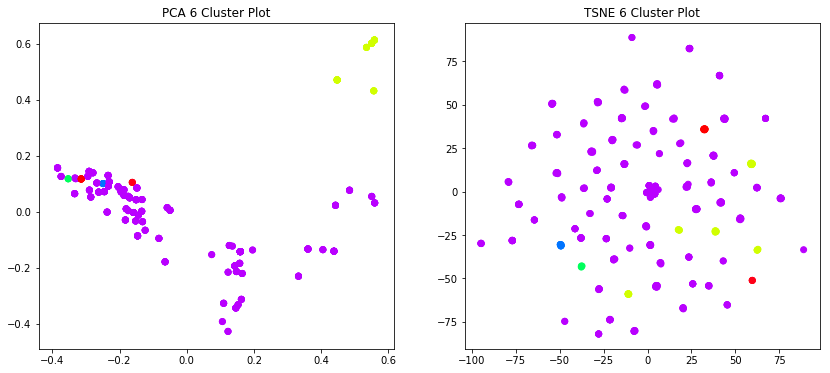

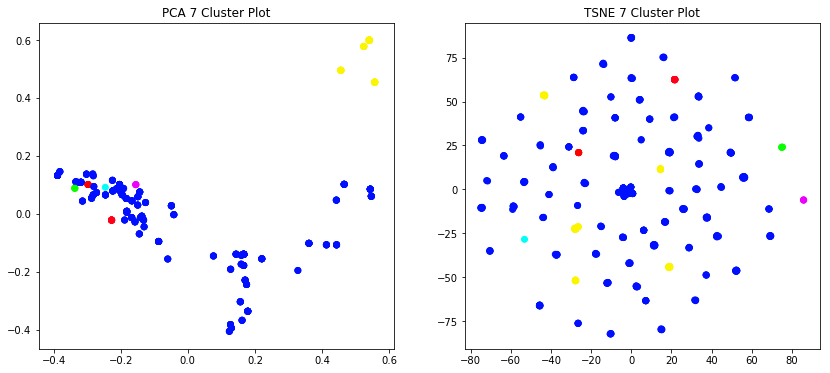

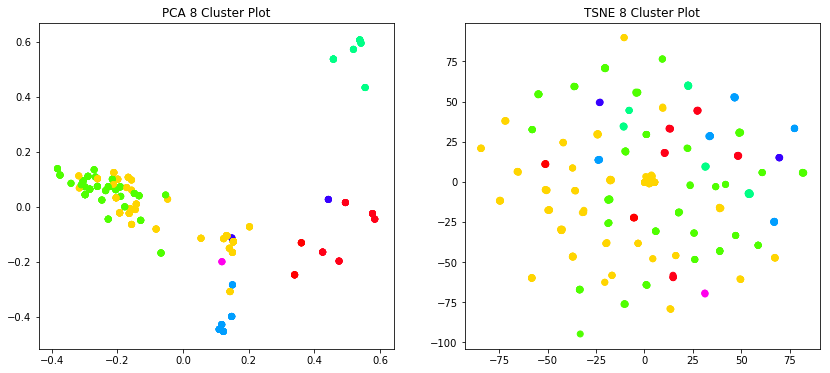

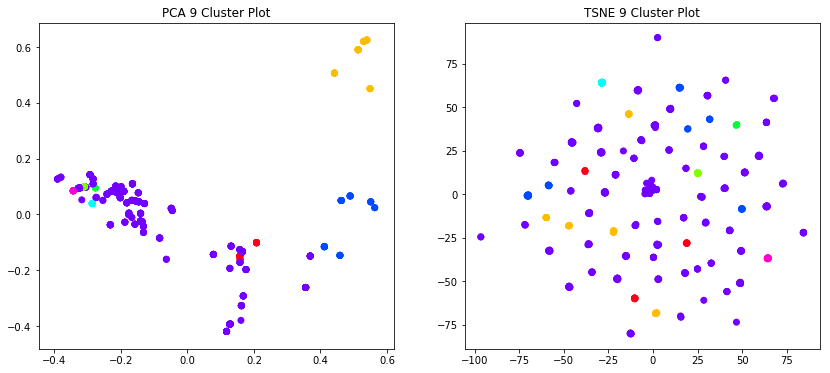

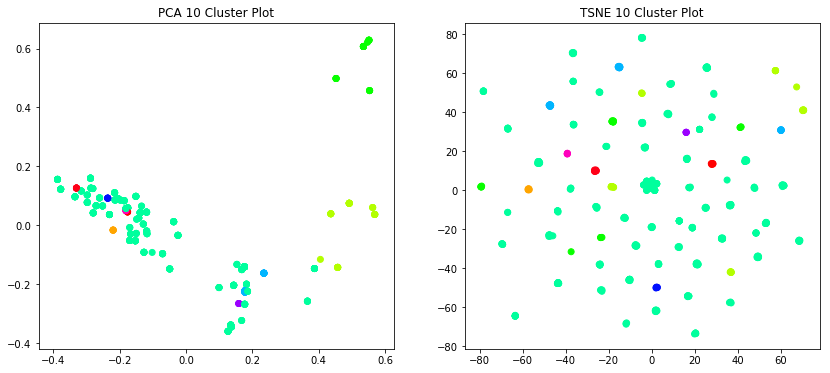

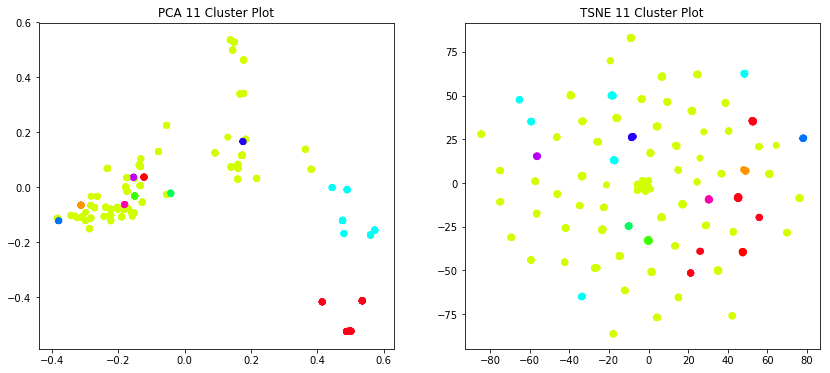

In [14]:
def plot_tsne_pca(data, labels, nb_clusters):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=20).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=500)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA {} Cluster Plot'.format(nb_clusters))
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE {} Cluster Plot'.format(nb_clusters))

for k in tqdm(range(6, 12)):
    clusters = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit_predict(text) 
    plot_tsne_pca(text, clusters, k)

In [9]:
# Custers optimaux k = 6 ou k = 7!
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(text) 

Meilleurs résultats avec 4 et 5 clusters. A valider avec les nuages de mots.

## Top Keywords


Cluster 0


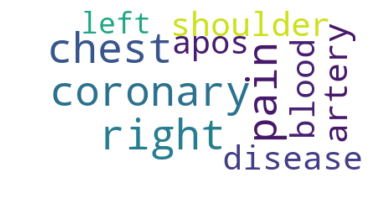


Cluster 1


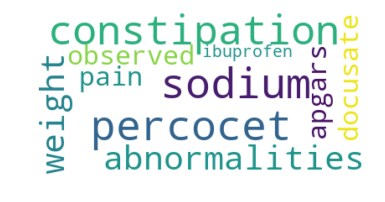


Cluster 2


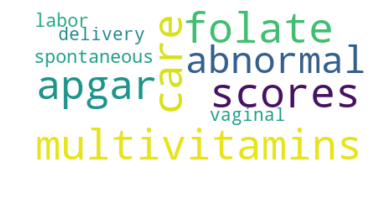


Cluster 3


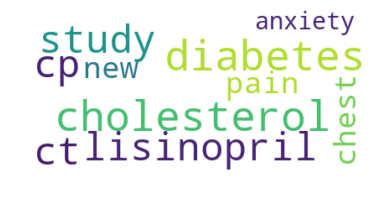


Cluster 4


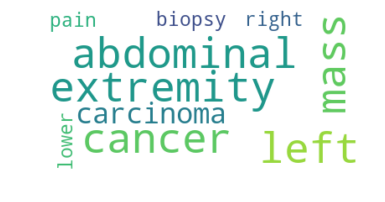


Cluster 5


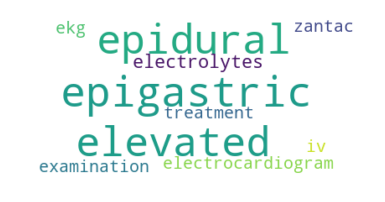


Cluster 6


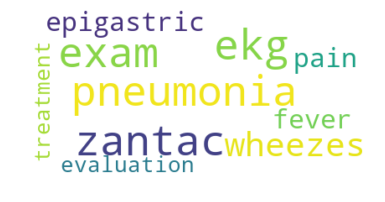


Cluster 7


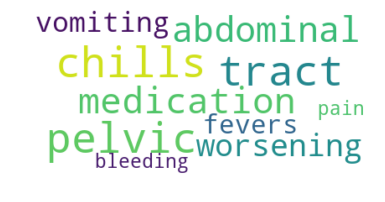


Cluster 8


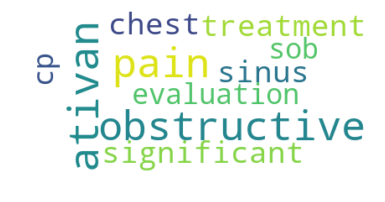


Cluster 9


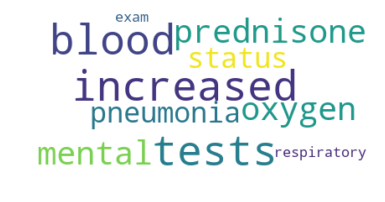


Cluster 10


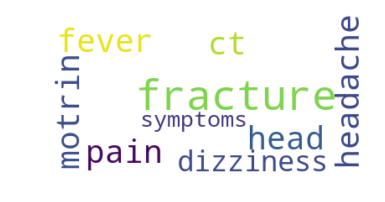


Cluster 11


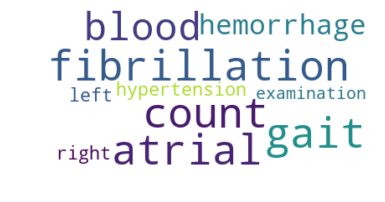

In [10]:
from wordcloud import WordCloud

def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        #print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        
        text = ' '.join([labels[t] for t in np.argsort(r)[-n_terms:]])
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
        print('\nCluster {}'.format(i))
        # print('Titles')
        # titles=wiki_cl[wiki_cl.cluster==k]['title']         
        # print(titles.to_string(index=False))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)